## Intro
### To instal finance run

pip install yfinance

pip install statsmodels

### Advise
For Quant Trading or Quant Research roles in finance, especially on the buy-side, it’s helpful to know that many core trading platforms and infrastructure components are built in C++, due to its speed and low-level memory control. While not mandatory for all roles, learning C++ can be a strong advantage—particularly if you're targeting firms involved in high-frequency trading (HFT) or any latency-sensitive strategies.

That said, Python remains the most widely used language for research and prototyping. You’ll want to be very comfortable with core libraries like NumPy, pandas, and scikit-learn—these are essential for data analysis, backtesting, and machine learning. Familiarity with Jupyter notebooks, code modularity, and version control (like Git) is also expected in many research teams.

On the statistical modeling side, your physics background likely gives you a head start. Many of the core quant techniques include:

Linear regression and multivariate analysis
Time-series modeling (e.g., ARIMA, GARCH)
Dimensionality reduction (e.g., PCA)
Optimization techniques
Machine learning algorithms (like random forests, gradient boosting, and even deep learning, depending on the firm)

The overarching goal in these roles is to identify *alpha signals*—statistical patterns or features in market data that can be used to generate profitable trades. This involves ingesting large datasets, cleaning and analyzing them, and building models that capture market inefficiencies.

If you're already familiar with statistical modeling and ML techniques—and comfortable coding in Python—you’re in a strong position to start applying. Many firms are very open to candidates with strong analytical backgrounds, even if they don’t yet have direct finance experience.

Avoid the larger or local banks if you want to stay in Singapore. Target companies with a size smaller than 20 in SG. They are not as affected by visa sponsorship requirements. 

Banks will be tougher as they have a requirement for locals and PRs only due to visa sponsorship limitations

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download S&P 500 data from 2000-01-01 to 2009-12-31
sp500 = yf.download('^GSPC', start='2000-01-01', end='2009-12-31')

# Show first few rows
print(sp500.head())

# Optional: save to CSV
sp500.to_csv('sp500_2000_2009.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000


# Chapter 1 : Returns

We will be studying by following the book: 

Financial Risk Forecasting: The Theory and Practice of Forecasting Market Risk with Implementation in R and Matlab 

by Jon Danielsson

### Data

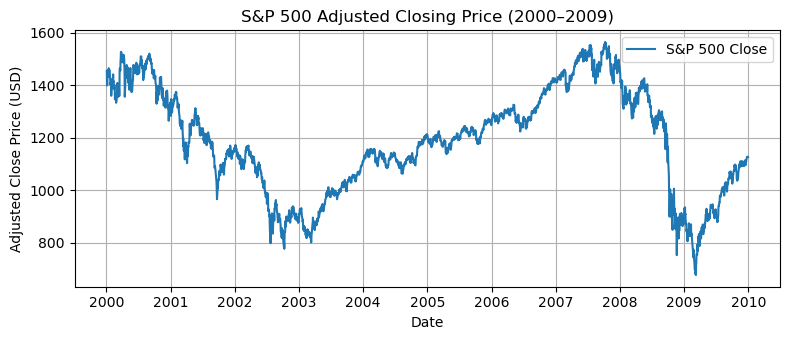

In [3]:
# Plot adjusted close over time
plt.figure(figsize=(8, 3.5))
plt.plot(sp500.index, sp500['Close'], label='S&P 500 Close')

# Get first 5 days
# A = sp500['Close']
# print(A.index[:5])  
# value = sp500['Close'].loc['2005-06-15']
# print(value[0])

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.title('S&P 500 Adjusted Closing Price (2000–2009)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Returns

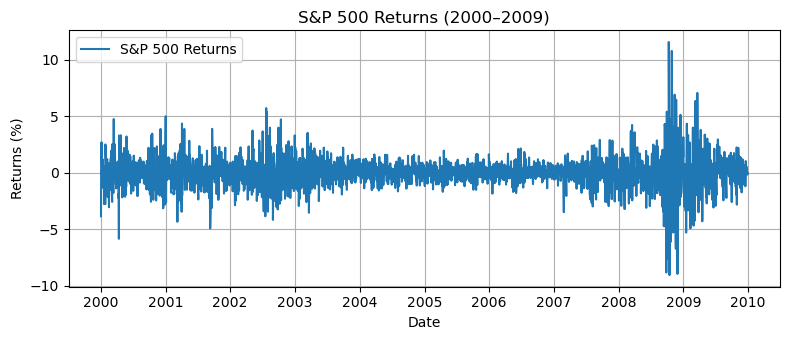

In [4]:
close_array = sp500['Close'].values.flatten()

returns = np.diff(close_array) / close_array[:-1]

plt.figure(figsize=(8, 3.5))
plt.plot(sp500.index[:-1], 100*returns, label='S&P 500 Returns')

plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('S&P 500 Returns (2000–2009)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Basic moments

In [5]:
import numpy as np
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming y is a numpy array or a list of data points

# Mean
mean_SaP = np.mean(returns)
# Standard deviation
std_SaP = np.std(returns)
# Min
min_SaP = np.min(returns)
# Max
max_SaP = np.max(returns)
# Skewness
skew_SaP = skew(returns)
# Kurtosis
kurt_SaP = kurtosis(returns)

# Autocorrelation (lag 1) for y
def sacf(y, lag):
    acf = np.corrcoef(y[:-lag], y[lag:])[0, 1]  # Autocorrelation of lag
    return acf

acf_SaP = sacf(returns, 1)

# Autocorrelation (lag 1) for y^2
acf_SaP_squared = sacf(np.square(returns), 1)
# Jarque-Bera test
jb_stat, jb_pval = jarque_bera(returns)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
# Print results
print(color.BOLD + 'S&P 500 moment from 2000 to 2009' + color.END)
print(f'Mean: {100*mean_SaP} %')
print(f'Standard Deviation: {100*std_SaP} %')
print(f'Min: {100*min_SaP} %')
print(f'Max: {100*max_SaP} %')
print(f'Skewness: {skew_SaP}')
print(f'Kurtosis: {kurt_SaP}')
print(f'ACF (lag 1) for y: {100*acf_SaP} %')
print(f'ACF (lag 1) for y^2: {100*acf_SaP_squared} %')
print(f'Jarque-Bera Test: Stat = {jb_stat}, p-value = {100*jb_pval} %')

S&P 500 moment from 2000 to 2009
Mean: -0.00038660409279602203 %
Standard Deviation: 1.4002574512443813 %
Min: -9.034977808622578 %
Max: 11.580036951513694 %
Skewness: 0.09948007746030324
Kurtosis: 7.853638663417037
ACF (lag 1) for y: -8.83824851502897 %
ACF (lag 1) for y^2: 18.738961005242093 %
Jarque-Bera Test: Stat = 6462.517226129015, p-value = 0.0 %


### S&P 500 Volatility

Volatility si the standard deviation of returns. The Volatility is computed as

$\sigma_{\rm annual} = \sigma_{\rm period} \sqrt{\rm periods ~per ~year}$. So annualised volatility always goes with $\sqrt{252}$

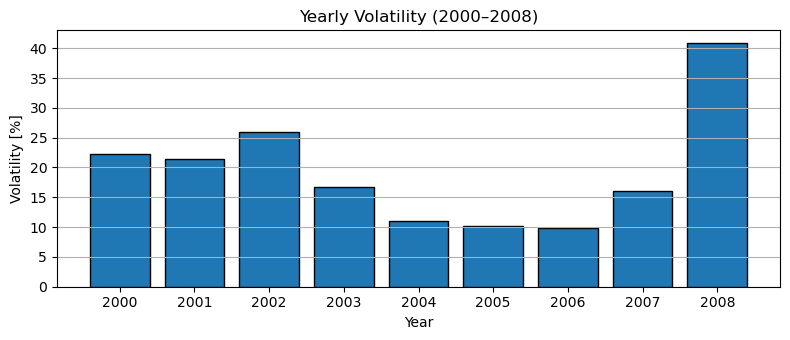

In [7]:
# Compute the returns and volatility per year
N_years = 9
year_vol = np.zeros(N_years,)
for i in range(N_years):
    start_date = "".join(("200", str(i),"-01-01"))
    end_date = "".join(("200", str(i+1),"-01-01"))
    values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
    year_return = np.diff(values_close) / values_close[:-1]
    year_vol[i] = 100*np.std(year_return) * np.sqrt(252)  # annualized daily volatility

years = ["200" + str(i) for i in range(N_years)]
# Plot chart
plt.figure(figsize=(8, 3.5))
plt.bar(years, year_vol, edgecolor='black')
plt.title('Yearly Volatility (2000–2008)')
plt.xlabel('Year')
plt.ylabel('Volatility [%]')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

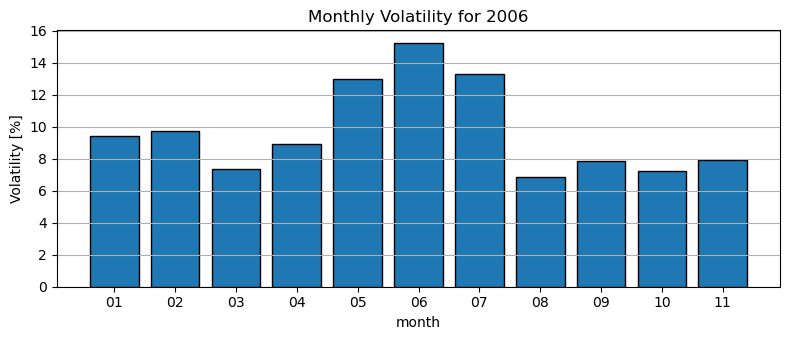

In [8]:
# Compute the returns and volatility per month
N_month = 12
month_vol = np.zeros(N_month-1,)
year = "2006"
for i in range(N_month-1):
    start_date = "".join((year, "-", str(i+1).zfill(2), "-01"))
    end_date   = "".join((year, "-", str(i+2).zfill(2), "-01"))
    values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
    month_return = np.diff(values_close) / values_close[:-1]
    month_vol[i] = 100*np.std(month_return) * np.sqrt(252)  # annualized daily volatility

months = [str(i+1).zfill(2) for i in range(N_month-1)]
# Plot chart
plt.figure(figsize=(8, 3.5))
plt.bar(months, month_vol, edgecolor='black')
plt.title("".join('Monthly Volatility for ' + year))
plt.xlabel('month')
plt.ylabel('Volatility [%]')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

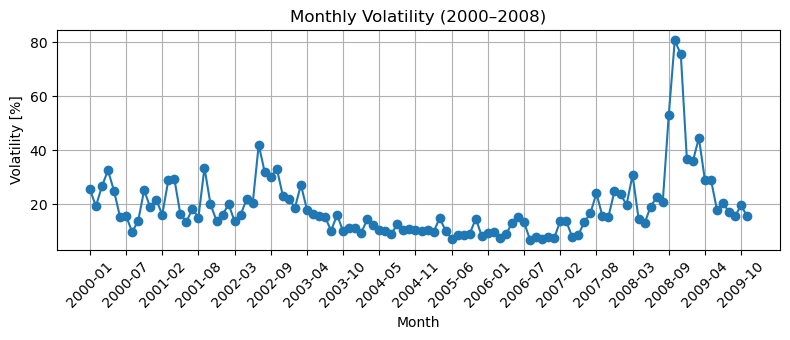

In [9]:
# Compute the returns and volatility per month
N_month = 12
N_years = 10
month_vol = []
month_labels = []
for j in range(N_years):
    year = f"200{j}"
    for i in range(N_month-1):
        start_date = f"{year}-{str(i+1).zfill(2)}-01"
        end_date   = f"{year}-{str(i+2).zfill(2)}-01"
        values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
        month_return = np.diff(values_close) / values_close[:-1]
        month_vol.append(100*np.std(month_return) * np.sqrt(252))  # annualized daily volatility
        label = f"{year}-{str(i+1).zfill(2)}"
        month_labels.append(label)


plt.figure(figsize=(8, 3.5))
plt.plot(month_vol, marker='o')
plt.xticks(ticks=range(0, len(month_labels), 6), labels=month_labels[::6], rotation=45)
plt.title('Monthly Volatility (2000–2008)')
plt.xlabel('Month')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.tight_layout()
plt.show()

### ACF
A standard graphical method for exploring predictability in statistical data is the
autocorrelation function (ACF). The ACF measures how returns on one day are correlated with returns on previous days. If such correlations are statistically significant, we
have strong evidence for predictability.

### Fat tails
A random variable is said to have fat tails if it exhibits more
extreme outcomes than a normally distributed random variable with the same mean
and variance.

# Chapter 2 : Univariate volatility forecasting

## Models for the volatility estimations

Assume that mean return is zero. While this is obviously not correct, the
daily mean is orders of magnitude smaller than volatility and therefore can usually be
safely ignored for the purpose of volatility forecasting.

### Moving average models (MA)

Fow the window $W_E$ such is defined as:

$\sigma_t^2 = \frac{1}{W_E}\sum_{i = 1 }^{W_E} y^2_{t-i}.$

$y_t$ is the return. No parameters, super bad. Due to 'volatility clasters' weighting old values equivally with new has poor predicatability.

### Exponentially weighted moving average model (EWMA)

Defined as:

$\sigma_t^2 = \frac{1-\lambda}{\lambda(1-\lambda^W_E)}\sum_{i = 1 }^{W_E} \lambda^iy^2_{t-i}.$

When the model was first proposed by J.P. Morgan it was suggested that $\lambda$ be set at 0.94
for daily returns. However, it is clearly not realistic to expect $\lambda$ to be the same for all assets and time periods.

Conditional volatility:

$\sigma_t^2 = (1-\lambda)y^2_{t-1} + \lambda \sigma_{t-1}^2$

### Autoregressive integrated moving average (ARIMA)

Non-seasonal ARIMA models are usually denoted ARIMA(p, d, q) where parameters p, d, q are non-negative integers: p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model. Seasonal ARIMA models are usually denoted ARIMA(p, d, q)(P, D, Q)m, where the uppercase P, D, Q are the autoregressive, differencing, and moving average terms for the seasonal part of the ARIMA model and m is the number of periods in each season.

Some well-known special cases arise naturally or are mathematically equivalent to other popular forecasting models. For example:

ARIMA(0, 0, 0) models white noise.
An ARIMA(0, 1, 0) model is a random walk.
An ARIMA(0, 1, 2) model is a Damped Holt's model.
An ARIMA(0, 1, 1) model without constant is a basic exponential smoothing model.
An ARIMA(0, 2, 2) model is given by 


### GARCH AND CONDITIONAL VOLATILITY

Lowercase letters $y_t$ indicate sample observations and uppercase letters $Y_t$ denote
random variables (RVs). The main object of interest is the conditional volatility of $Y_t$ (i.e., $\sigma_t$);

We assume that the sample data has been de-meaned (i.e., the unconditional mean has
been subtracted from the returns). In what follows we assume that $E(Y_t) = 0$, unless
otherwise indicated.

For:

1. IDD (Independent and identically distributed)
2. Realized Volatility (RV) = 1, with $Z_t = 1$

The ruturn is:

$Y_t = \sigma_t Z_t$

We don’t need to make any further assumptions about the distribution of $Z_t$. In most
cases it is assumed to be normal ($\mathcal{N}(0,1)$), but other distributions are frequently used, such as the
Student-t.

An important feature of GARCH-type models is that unconditional volatility $\sigma$
depends on the entire sample—while conditional volatilities $\sigma_t$ are determined by model
parameters and recent return observations.

Off-top: I wonder, is it the same:

$RV_t = \sum_i^n r_{i,t}^2, \qquad Z_t = (RV_t-\mu)/\sigma_t^2 $

#### First model to capture the volatility clusters is ARCH

With

$\sigma_t^2 = \omega + \alpha Y_{t-1}^2,\qquad \sigma = \frac{\omega}{1-\alpha}$

positive coefs only; $\alpha < 1$

### GARCH ($L_1,L_2$)

With

$\sigma_t^2 = \omega + \sum_{i = 1}^{L_1}\alpha_i Y_{t-1}^2+\sum_{j = 1}^{L_2}\beta_j \sigma_{t-j}^2,\qquad \sigma_t^2 =\omega+\alpha Y^2_{t-1}+\beta \sigma^2_{t-1}$

positive coefs only; $\alpha+\beta<1$; model has some memory;

half-life defined as:

$\sigma^2_{t+n*,t}-\sigma^2 = \frac12(\sigma^2_{t+1,t}-\sigma^2),\qquad n* = 1+\frac{\log(1/2)}{\log(\alpha+\beta)} $

Hansen and Lunde (2005) used two goodness-of-fit measures to compare numerous out-of-sample ARCH-type models; they concluded that the APARCH(2,2) model performed the best.

Alternatively one can compare the models by analyzing the residualsof the models using methods such as the Jarque–Bera test for normality and the Ljung–Box test for autocorrelations.

### APARCH

With

$\sigma_{t+1}^\delta = \omega + \sum_{i = 1}^{L_1}\alpha_i (|Y_{t-1}|-\zeta_iY_{t-i})^\delta+\sum_{j = 1}^{L_2}\beta_j \sigma_{t-j}^\delta$

Occasionally fails and model is one of the most complicated models in use.

## Conditional volatility estimation using GARCH

run (if not already) 

pip install arch


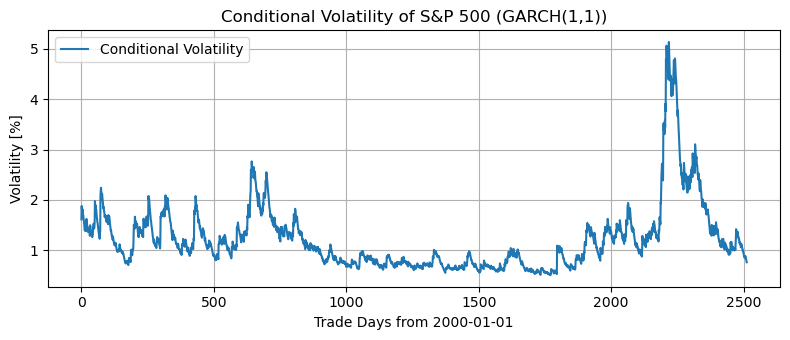

In [14]:
from arch import arch_model
# S&P returns
close_array = sp500['Close'].values.flatten()
returns = 100*np.diff(close_array) / close_array[:-1] # percentage returns

# Fit a GARCH(1,1) model to the whole period
am = arch_model(returns, vol='Garch', p=1, q=1)
res = am.fit(disp='off')  # suppress output

# Conditional volatility forecast (daily)
cond_vol = res.conditional_volatility

# Plot
plt.figure(figsize=(8, 3.5))
plt.plot(cond_vol, label='Conditional Volatility')
plt.title('Conditional Volatility of S&P 500 (GARCH(1,1))')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Contrast daily vol

Forecasting: 100%|██████████| 1006/1006 [00:12<00:00, 81.03it/s]


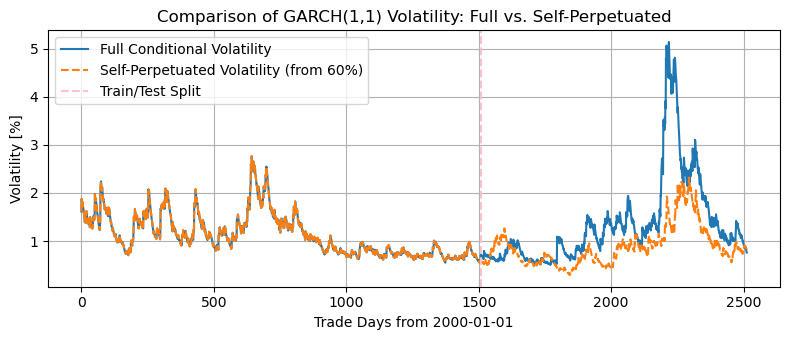

In [27]:
from tqdm import tqdm

# Compute daily returns (percentage)
close_array = sp500['Close'].values.flatten()
returns = 100 * np.diff(close_array) / close_array[:-1]

######## Full data conditional volatility ########
am_full = arch_model(returns, vol='Garch', p=1, q=1)
res_full = am_full.fit(disp='off')
cond_vol_full = res_full.conditional_volatility

######## Self-perpetuated conditional volatility ########
split_index = int(len(returns) * 0.6)
est_cond_vol = np.zeros_like(cond_vol_full)

# First 60%: use true fitted volatilities from model trained on full data (for fair comparison)
est_cond_vol[:split_index] = cond_vol_full[:split_index]

# Fit model on training set only
train_returns = returns[:split_index]
test_returns = returns[split_index:]
history = train_returns.tolist()

# Roll through each test point and forecast 1-step ahead, appending real data each time
for i in tqdm(range(len(test_returns)), desc="Forecasting"):
    am = arch_model(history, vol='Garch', p=1, q=1)
    res = am.fit(disp='off')
    
    forecast = res.forecast(horizon=1)
    tomorrow_var = forecast.variance.values[-1, 0]
    tomorrow_vol = np.sqrt(tomorrow_var)
    
    est_cond_vol[split_index + i] = tomorrow_vol

    # Append actual return to the history for next step
    # history.append(test_returns[i]) # feed real data
    history.append(np.random.normal(loc=0, scale=tomorrow_vol)) # feed guessed return

# Plot
plt.figure(figsize=(8, 3.5))
plt.plot(cond_vol_full, label='Full Conditional Volatility')
plt.plot(est_cond_vol, label='Self-Perpetuated Volatility (from 60%)', linestyle='--')
plt.axvline(x=split_index, color='pink', linestyle='--', label='Train/Test Split')
plt.title('Comparison of GARCH(1,1) Volatility: Full vs. Self-Perpetuated')
plt.xlabel('Trade Days from 2000-01-01')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

So even though I pretending it's a forecast, I still feeding it the same returns as the full model would see eventually. Hence, the recursion and response of volatility to returns will be nearly identical.

To make a real forecan I need other model to introduce estimated tomorrow return:

history.append(test_returns[i]) # feed real data

Forecast out-of-sample without ever seeing real future returns (simulate them or keep mean=0).

#### Comments

It has been empirically noted that stock returns are sometimes negatively correlated with
changes in volatility: volatility tends to rise following bad news and fall following good
news. This is called the ‘‘leverage effect’’, as it could be explained by firms’ use of
leverage. The leverage effect is not easily detectable in stock indices and is not expected
to be significant in foreign exchange.

GARCH(1,1) model, tomorrow’s volatility is quadratic in
today’s return, and the sign of today’s return does not matter. We need to introduce
asymmetry to capture leverage effects (i.e., the impacts of negative and positive shocks
have to be different).


A straightforward way to incorporate leverage effects in the GARCH model is to use
the model of Glosten et al. (1993) (GJR-GARCH, also known as threshold-GARCH).

<Figure size 800x350 with 0 Axes>

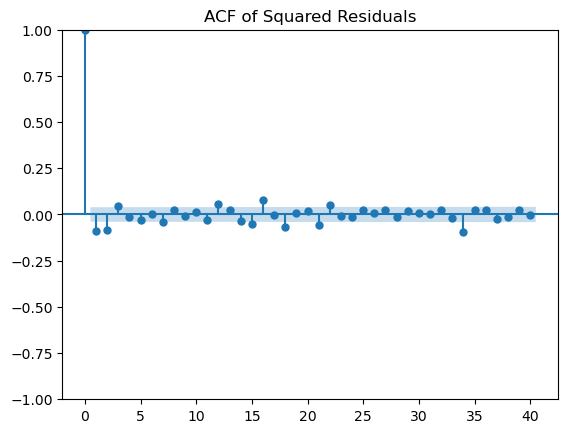

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming returns is your 1D numpy array or list of returns
residuals = returns - np.mean(returns)  # demean if needed

# Plot ACF of squared residuals
plt.figure(figsize=(8, 3.5))
plot_acf(residuals, lags=40)
plt.title("ACF of Squared Residuals")
plt.show()

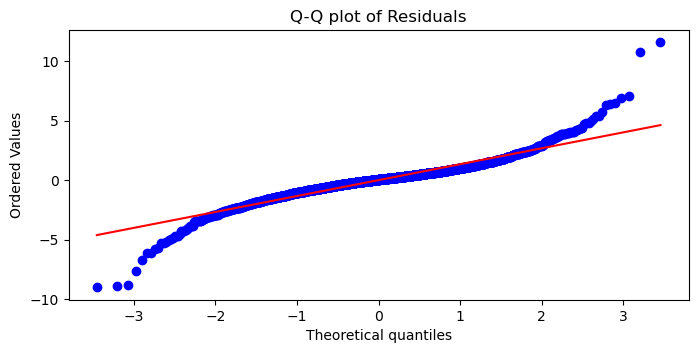

In [31]:
import scipy.stats as stats

# Suppose residuals is your array of residuals
# Example: residuals = returns - np.mean(returns)

plt.figure(figsize=(8, 3.5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q plot of Residuals")
plt.show()

### Stochastic volatility model

$Y_t = Z_t \sigma_t$

$\sigma_t^2 = \exp[\delta_0 +\delta_1 \log \sigma_{t-1}^2 +\delta_2\eta_t]$

Where $(Z_t,\eta_t)^T\sim\mathcal{N}(0,[1,\zeta;\zeta;1])$. $\zeta$ provides correlation between returns and volatility, giving rise to the leverage effect.

# Chapter 3 : Multivariate volatility models